In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

In [2]:
# Load data
raw_data = pd.read_csv('results/best_model_results.csv', index_col=0)
display(raw_data.head(5))

,start_station_cluster,end_station_cluster,is_holiday,is_weekend,mean_temperature,total_precipitation,actual,pred,start_date
0,0,0,False,False,9.2,8.2,12,22.608579,2022-04-13
1,0,2,False,False,9.2,8.2,1,2.307922,2022-04-13
2,0,8,False,False,9.2,8.2,1,1.689191,2022-04-13
3,0,10,False,False,9.2,8.2,1,6.103692,2022-04-13
4,0,14,False,False,9.2,8.2,1,8.568320,2022-04-13


In [3]:
# Pick a single day, last day chosen here
single_day = raw_data[raw_data['start_date']==max(raw_data['start_date'])].copy()
single_day['actual_norm'] = single_day['actual']/max(single_day['actual'])
single_day['pred_norm'] = single_day['pred']/max(single_day['pred'])

In [4]:
G = nx.from_pandas_edgelist(single_day, 
                            source='start_station_cluster', 
                            target='end_station_cluster', 
                            edge_attr=['actual_norm', 'pred_norm'],
                            create_using=nx.DiGraph)

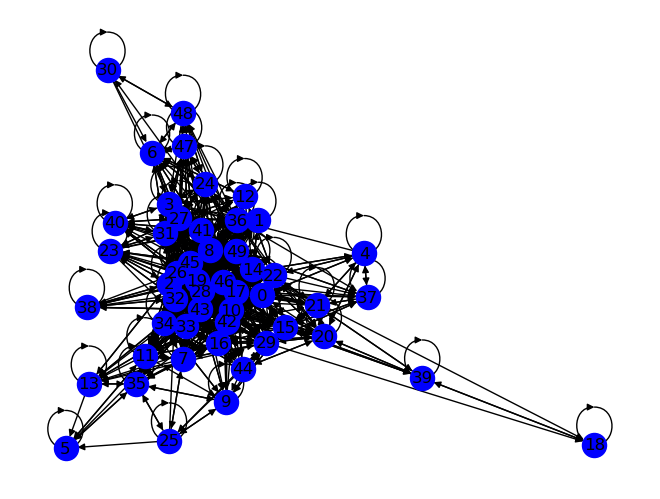

In [5]:
G_plot = nx.spring_layout(G)
nx.draw(G, pos=G_plot, node_color='blue', with_labels=True)

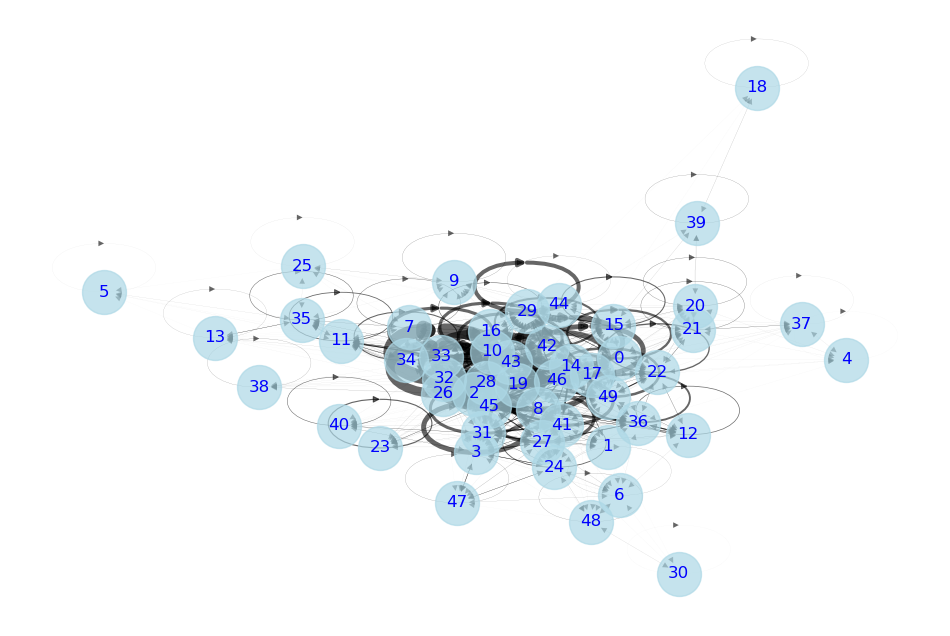

In [18]:
widths_actual = nx.get_edge_attributes(G, 'actual_norm')
widths_pred = nx.get_edge_attributes(G, 'pred_norm')
nodelist = G.nodes()

plt.figure(figsize=(12,8))

pos = nx.spring_layout(G, seed=10)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1000,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths_actual.keys(),
                       width=[10*i for i in list(widths_actual.values())],
                       edge_color='black',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.savefig("results/actual.png")
plt.show()

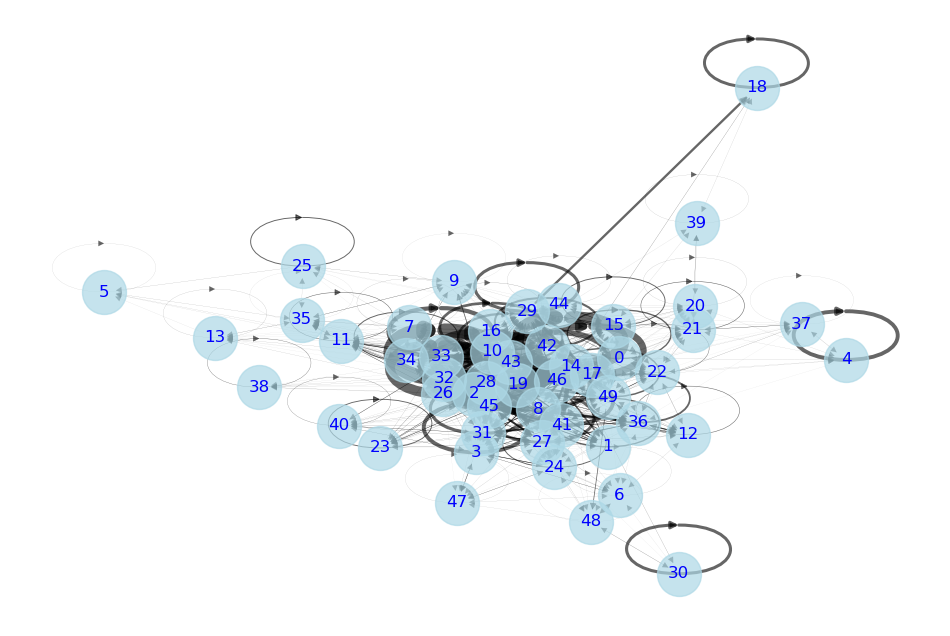

In [19]:
plt.figure(figsize=(12,8))

nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1000,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths_actual.keys(),
                       width=[10*i for i in list(widths_pred.values())],
                       edge_color='black',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.savefig("results/pred.png")
plt.show()